In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | rognan
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | maldonado
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | zhigansk
Processing Record 8 of Set 1 | waingapu
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | oranjestad
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | mukhen
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | susanville
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | tiznit
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | dargaville
Processing Record 21 of Set 1 | aykhal
Processing Record 22 of Set 1 | chokurdakh
Processing 

Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | tateyama
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | itaituba
Processing Record 45 of Set 4 | pimentel
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | cairns
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | cabinda
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | non thai
Processing Record 4 of Set 5 | dolores
Processing Record 5 of Set 5 | orange park
Processing Record 6 of Set 5 | kununurra
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | nipawin
Processing Record 9 of Set 5 | batemans bay
Processing Record 10 of Set 5 | strezhevoy
Processing Record 1

Processing Record 24 of Set 8 | guaranda
Processing Record 25 of Set 8 | nemuro
Processing Record 26 of Set 8 | san roque
Processing Record 27 of Set 8 | pangai
Processing Record 28 of Set 8 | taltal
Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | manggar
Processing Record 31 of Set 8 | altay
Processing Record 32 of Set 8 | dwarka
Processing Record 33 of Set 8 | jalingo
Processing Record 34 of Set 8 | skopelos
Processing Record 35 of Set 8 | aflu
City not found. Skipping...
Processing Record 36 of Set 8 | esmeraldas
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | fare
Processing Record 39 of Set 8 | omboue
Processing Record 40 of Set 8 | karasjok
Processing Record 41 of Set 8 | dzhebariki-khaya
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | kralendijk
Processing Record 44 of Set 8 | bam
Processing Record 45 of Set 8 | warri
Processing Record 46 of Set 8 | coolum beach
Processing Record 47 of Set 8 | kieta
Process

Processing Record 12 of Set 12 | badaojiang
City not found. Skipping...
Processing Record 13 of Set 12 | bafoulabe
Processing Record 14 of Set 12 | gari
Processing Record 15 of Set 12 | camana
Processing Record 16 of Set 12 | butembo
Processing Record 17 of Set 12 | mahajanga
Processing Record 18 of Set 12 | humaita
Processing Record 19 of Set 12 | mazulskiy
City not found. Skipping...
Processing Record 20 of Set 12 | riachao do jacuipe
Processing Record 21 of Set 12 | menomonie
Processing Record 22 of Set 12 | zlotoryja
Processing Record 23 of Set 12 | terpinnya
Processing Record 24 of Set 12 | raudeberg
Processing Record 25 of Set 12 | aswan
Processing Record 26 of Set 12 | abiy adi
City not found. Skipping...
Processing Record 27 of Set 12 | taksimo
Processing Record 28 of Set 12 | cockburn town
Processing Record 29 of Set 12 | boende
Processing Record 30 of Set 12 | teya
Processing Record 31 of Set 12 | marang
Processing Record 32 of Set 12 | la ronge
Processing Record 33 of Set 12

In [10]:
len(city_data)

551

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
541,Warren,39.4334,-84.1666,43.41,89,90,1.01,US,2021-12-18 06:09:25
542,Kurilsk,45.2333,147.8833,23.13,61,97,28.86,RU,2021-12-18 06:09:25
543,Evanston,42.0411,-87.6901,40.95,72,90,3.00,US,2021-12-18 06:09:26
544,Doka,13.5167,35.7667,75.72,44,66,9.93,SD,2021-12-18 06:09:26
545,Bubaque,11.2833,-15.8333,81.01,62,100,7.29,GW,2021-12-18 06:09:26
546,Nevelsk,46.6733,141.8633,9.03,80,100,21.23,RU,2021-12-18 06:10:27
547,Suntar,62.1444,117.6319,-37.86,99,76,2.15,RU,2021-12-18 06:10:27
548,Arlit,18.7369,7.3853,59.02,25,40,7.96,NE,2021-12-18 06:10:27
549,Adrar,20.5022,-10.0711,71.51,35,99,8.19,MR,2021-12-18 06:10:28
550,Valparaiso,-33.0393,-71.6273,55.04,76,0,3.44,CL,2021-12-18 06:10:28


In [14]:
# reorder the columns in the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.tail()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
546,Nevelsk,RU,2021-12-18 06:10:27,46.6733,141.8633,9.03,80,100,21.23
547,Suntar,RU,2021-12-18 06:10:27,62.1444,117.6319,-37.86,99,76,2.15
548,Arlit,NE,2021-12-18 06:10:27,18.7369,7.3853,59.02,25,40,7.96
549,Adrar,MR,2021-12-18 06:10:28,20.5022,-10.0711,71.51,35,99,8.19
550,Valparaiso,CL,2021-12-18 06:10:28,-33.0393,-71.6273,55.04,76,0,3.44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import time module
import time

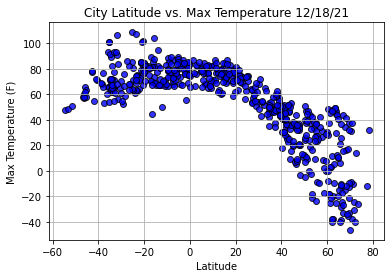

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            color="blue", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

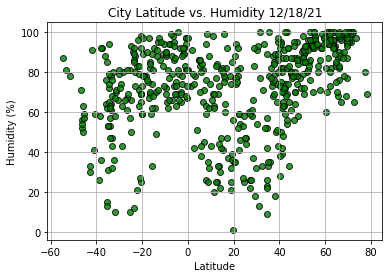

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            color="green", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

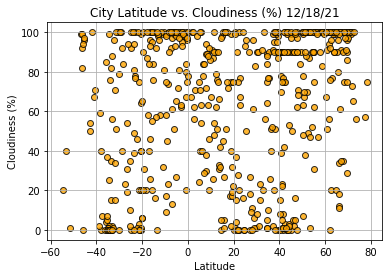

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            color="orange", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

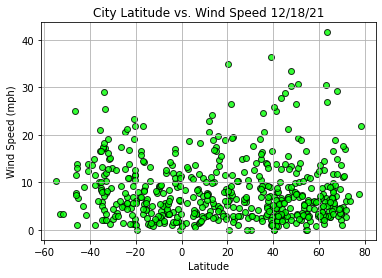

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            color="lime", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()